<a href="https://colab.research.google.com/github/praveentn/MidcurveNN/blob/master/cnn_encdec/notebook_cnn_autoencoder_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN ENC-DEC

In [1]:
# mount google drive & set working directory
# requires auth (click on url & copy token into text box when prompted)
from google.colab import drive
drive.mount("/content/gdrive")

import os
print(os.getcwd())

os.chdir('/content/gdrive/My Drive/Colab Notebooks/MidcurveNN')
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
/content/gdrive/My Drive/Colab Notebooks/MidcurveNN


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers, optimizers
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,RMSprop,SGD
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten,AveragePooling2D,UpSampling2D
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from random import shuffle
import PIL
import json
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('TKAgg')
%matplotlib inline

Using TensorFlow backend.


In [3]:
# working directory
wdir = os.getcwd()
wdir

'/content/gdrive/My Drive/Colab Notebooks/MidcurveNN'

In [4]:
# _URL = 'https://drive.google.com/uc?export=download&id=16rqDFLO__WySSQGlAht0FEj2uJZg4M9M'

# path_to_zip = tf.keras.utils.get_file('input.zip',
#                                       origin=_URL,
#                                       extract=True)

# input_data_folder = os.path.join(os.path.dirname(path_to_zip), 'input')
input_data_folder = wdir + "/data/input"
input_data_folder = wdir + "/data/images"
print("input data dir: ", input_data_folder)

input data dir:  /content/gdrive/My Drive/Colab Notebooks/MidcurveNN/data/images


In [5]:
import glob

image_paths = glob.glob(input_data_folder + '/**/*.png', recursive=True)
images = [os.path.basename(img_path) for img_path in image_paths]

print(len(images))

#images = os.listdir(input_data_folder)
images[99]

4256


'CapI_Midcurve_mirrored_0_translated_10_-20.png'

In [0]:
# image dimension
imdim = 100

In [0]:
def read_input_image_pairs(datafolder=input_data_folder):
    profile_pngs = []
    midcurve_pngs = []
    for file in os.listdir(datafolder):
        fullpath = os.path.join(datafolder, file)
        if os.path.isdir(fullpath):
            continue
        if file.endswith(".png"):
            if file.find("Profile") != -1:
                profile_pngs.append(fullpath)
            if file.find("Midcurve") != -1:
                midcurve_pngs.append(fullpath)
    profile_pngs = sorted(profile_pngs)
    midcurve_pngs = sorted(midcurve_pngs)
    return profile_pngs,midcurve_pngs

In [0]:
def get_training_data(datafolder=input_data_folder):
    profile_pngs,midcurve_pngs = read_input_image_pairs(datafolder)
    
    profile_pngs_objs = [img_to_array(load_img(f, color_mode='rgba', target_size=(imdim, imdim))) for f in profile_pngs ]
    midcurve_pngs_objs = [img_to_array(load_img(f, color_mode='rgba', target_size=(imdim, imdim))) for f in midcurve_pngs]

#     profile_pngs_objs = np.array([x.reshape((1,) + x.shape) for x in profile_pngs_objs])
#     midcurve_pngs_objs = np.array([x.reshape((1,) + x.shape) for x in midcurve_pngs_objs])

    profile_pngs_gray_objs = [x[:,:,3] for x in profile_pngs_objs]
    midcurve_pngs_gray_objs =[x[:,:,3] for x in midcurve_pngs_objs]
    
#     profile_pngs_gray_objs = [np.where(x>128, 0, 1) for x in profile_pngs_gray_objs]
#     midcurve_pngs_gray_objs =[np.where(x>128, 0, 1) for x in midcurve_pngs_gray_objs]
        
    # shufle them
    zipped_profiles_midcurves = [(p,m) for p,m in zip(profile_pngs_gray_objs,midcurve_pngs_gray_objs)]
    shuffle(zipped_profiles_midcurves)
    profile_pngs_gray_objs, midcurve_pngs_gray_objs = zip(*zipped_profiles_midcurves)
    
    return profile_pngs_gray_objs, midcurve_pngs_gray_objs

In [9]:
shapes = os.listdir('/content/gdrive/My Drive/Colab Notebooks/MidcurveNN/data/images')
shapes

['CapI',
 'Iuvw',
 'Tuvw',
 'Vuvw',
 'Sm_n',
 'InvV',
 'Parl',
 'Trap',
 'Stik',
 'Usla',
 'LapT',
 'RelY',
 'T002',
 'T003',
 'T004',
 'T005',
 'Plus',
 'SqLu',
 'Luvw']

In [10]:
profile_pngs_objs = ()
midcurve_pngs_objs = ()

for shape in shapes:
    print(shape)
    tp, tm = get_training_data(os.path.join(input_data_folder, shape))
    profile_pngs_objs += tp
    midcurve_pngs_objs += tm
    print(len(profile_pngs_objs), len(midcurve_pngs_objs))

CapI
112 112
Iuvw
224 224
Tuvw
336 336
Vuvw
448 448
Sm_n
560 560
InvV
672 672
Parl
784 784
Trap
896 896
Stik
1008 1008
Usla
1120 1120
LapT
1232 1232
RelY
1344 1344
T002
1456 1456
T003
1568 1568
T004
1680 1680
T005
1792 1792
Plus
1904 1904
SqLu
2016 2016
Luvw
2128 2128


In [11]:
len(profile_pngs_objs)

2128

In [12]:
profile_pngs_objs[0].shape

(100, 100)

In [13]:
type(midcurve_pngs_objs)

tuple

In [0]:
def plot_results(original_imgs,computed_imgs,n=10):
    # n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_imgs[i].reshape(imdim, imdim),cmap='gray_r')
#         plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(computed_imgs[i].reshape(imdim, imdim),cmap='gray_r')
#         plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

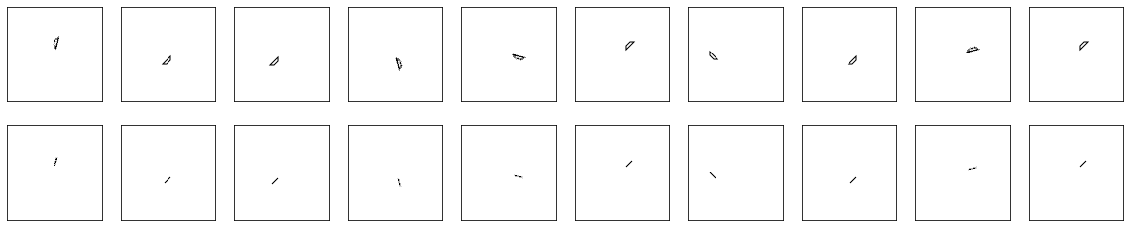

In [15]:
plot_results(profile_pngs_objs[830:850],midcurve_pngs_objs[830:850])

In [0]:
def get_train_test_split(profile_pngs_gray_objs, midcurve_pngs_gray_objs, encoding_dim=imdim, input_dim=imdim):

    # Training
    profile_pngs_flat_objs = [x.reshape(input_dim,input_dim,1) for x in profile_pngs_gray_objs]
    midcurve_pngs_flat_objs = [x.reshape(input_dim,input_dim,1) for x in midcurve_pngs_gray_objs]
    
    profile_pngs_objs = np.array(profile_pngs_flat_objs)
    midcurve_pngs_objs= np.array(midcurve_pngs_flat_objs)
    
    '''
    train_size = int(len(profile_pngs_objs)*0.7)
    x_train = profile_pngs_objs[:train_size]
    y_train = midcurve_pngs_objs[:train_size]
    x_test = profile_pngs_objs[train_size:]
    y_test = midcurve_pngs_objs[train_size:]
    '''
    x_train, x_test, y_train, y_test = train_test_split(profile_pngs_objs, midcurve_pngs_objs, 
                                                        test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

In [17]:
x_train, x_test, y_train, y_test = get_train_test_split(profile_pngs_objs, midcurve_pngs_objs)

print((len(x_train), len(y_train)), (len(x_test), len(y_test)))

(1702, 1702) (426, 426)


### Auto-encoder

In [0]:
class Autoencoder():
    def __init__(self):
        self.img_rows = imdim
        self.img_cols = imdim
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        adam_optimizer = Adam(lr=0.0005)
        optimizer = SGD(lr=0.0001, nesterov=False)
        
        self.autoencoder_model = self.build_model()
        #self.autoencoder_model.compile(loss='mean_squared_error', optimizer=RMSprop())
        #self.autoencoder_model.compile(loss='binary_crossentropy', optimizer=optimizer)
        self.autoencoder_model.compile(loss='mse', metrics=['accuracy'], optimizer=adam_optimizer)
        self.autoencoder_model.summary()
    
    def build_model(self):
        input_layer = Input(shape=self.img_shape)
        
        # sample 1
        # encoder
        x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer) # 28 x 28 x 32
        x = MaxPooling2D(pool_size=(2,2))(x) # 14 x 14 x 32
        x = Conv2D(64, (3,3), activation='relu', padding='same')(x)# 14 x 14 x 64
        x = MaxPooling2D(pool_size=(2,2))(x) # 7 x 7 x 64
        x = Conv2D(128, (3,3), activation='relu', padding='same')(x) # 7 x 7 x 128

        # decoder
        x = Conv2D(128, (3,3), activation='relu', padding='same')(x) # 7 x 7 x 128
        x = UpSampling2D((2,2))(x) # 14 x 14 x 128
        x = Conv2D(64, (3,3), activation='relu', padding='same')(x)# 14 x 14 x 64
        x = UpSampling2D((2,2))(x) # 28 x 28 x 64
        output_layer = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x) # 28 x 28 x 1

        
        '''
        # sample 2
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
        #x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        #x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
        #x = MaxPooling2D((2, 2), padding='same')(x)
        #encoded = MaxPooling2D((2, 2), padding='same')(x)

        # at this point the representation is compressed

        #x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
        x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
        #x = UpSampling2D((2, 2))(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        #x = UpSampling2D((2, 2))(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        #x = UpSampling2D((2, 2))(x)
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
        '''
        
        
        '''
        # encoder
        h = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer) #28 x 28 x 32
        h = MaxPooling2D(pool_size=(2, 2))(h) #14 x 14 x 32
        #h = Conv2D(64, (3, 3), activation='relu', padding='same')(h) #14 x 14 x 64
        #h = MaxPooling2D(pool_size=(2, 2))(h) #7 x 7 x 64
        #h = Conv2D(128, (3, 3), activation='relu', padding='same')(h) #7 x 7 x 128 (small and thick)

        #decoder
        #h = Conv2D(128, (3, 3), activation='relu', padding='same')(h) #7 x 7 x 128
        #h = UpSampling2D((2,2))(h) # 14 x 14 x 128
        #h = Conv2D(64, (3, 3), activation='relu', padding='same')(h) # 14 x 14 x 64
        #h = UpSampling2D((2,2))(h) # 28 x 28 x 64
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h) # 14 x 14 x 64
        h = UpSampling2D((2,2))(h) # 28 x 28 x 64
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(h) # 28 x 28 x 1
        '''
        
        return Model(input_layer, output_layer)
    
    def train_model(self, x_train, y_train, x_val, y_val, epochs, batch_size=20):
        early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1, 
                                       mode='auto')
        history = self.autoencoder_model.fit(x_train, y_train,
                                             batch_size=batch_size,
                                             epochs=epochs,
                                             validation_data=(x_val, y_val),
                                             callbacks=[early_stopping])
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
    
    def eval_model(self, x_test):
        preds = self.autoencoder_model.predict(x_test)
        return preds

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 25, 128)       147584    
__________

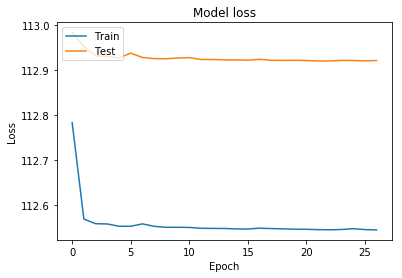

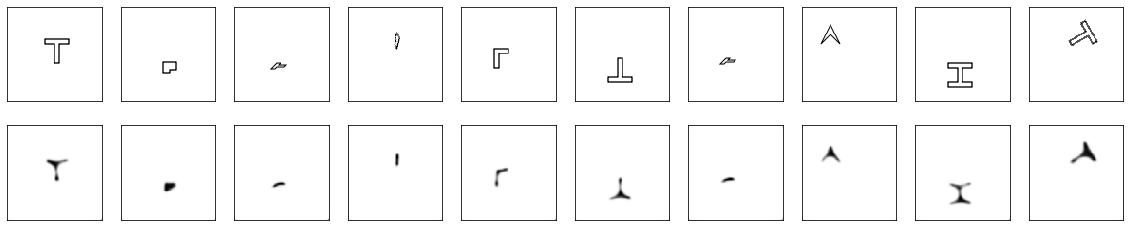

In [25]:
'''
x_train_reshaped = x_train
x_test_reshaped = x_test


noise_factor = 0.01 
x_train_noisy = x_train_reshaped + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape) 
x_test_noisy = x_test_reshaped + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_reshaped.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
'''

ae = Autoencoder()
#ae.train_model(x_train_noisy, y_train, x_test_noisy, y_test, epochs=50, batch_size=32)
ae.train_model(x_train, y_train, x_test, y_test, epochs=50, batch_size=64)

encoded_imgs = ae.eval_model(x_test)
decoded_imgs = ae.eval_model(encoded_imgs)

plot_results(x_test, decoded_imgs)